In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [3]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [4]:
random.seed(1)
torch.manual_seed(1)
if device == 'cuda':
    torch.cuda.manual_seed_all(1)

In [5]:
# hyperparameters
training_epochs = 20
batch_size = 64

In [7]:
# MNIST Datasets
mnist_train = dsets.MNIST(root='MNIST_data/',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                           train=False,
                           transform=transforms.ToTensor(),
                           download=True)


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
#Dataset Loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

In [13]:
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 100))
model.add_module('relu3', nn.ReLU())
model.add_module('fc4', nn.Linear(100, 10))

print(model)


Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)


In [18]:
# 비용 함수와 옵티마이저 정의
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [25]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        X = X.view(-1, 28 * 28)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_function(outputs, Y)
        loss.backward()
        optimizer.step()

        avg_cost += loss / total_batch

    print('Epoch:', '%04d'% (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Finished')

Epoch: 0001 cost = 0.116560139
Epoch: 0002 cost = 0.113717899
Epoch: 0003 cost = 0.111735649
Epoch: 0004 cost = 0.106886372
Epoch: 0005 cost = 0.095537752
Epoch: 0006 cost = 0.088884369
Epoch: 0007 cost = 0.087499663
Epoch: 0008 cost = 0.086068869
Epoch: 0009 cost = 0.098990031
Epoch: 0010 cost = 0.081153050
Epoch: 0011 cost = 0.092082843
Epoch: 0012 cost = 0.081702724
Epoch: 0013 cost = 0.084653474
Epoch: 0014 cost = 0.075858697
Epoch: 0015 cost = 0.079099059
Epoch: 0016 cost = 0.076500513
Epoch: 0017 cost = 0.086616911
Epoch: 0018 cost = 0.093865179
Epoch: 0019 cost = 0.069979444
Epoch: 0020 cost = 0.076701701
Epoch: 0021 cost = 0.090414084
Epoch: 0022 cost = 0.066005938
Epoch: 0023 cost = 0.070760287
Epoch: 0024 cost = 0.073245674
Epoch: 0025 cost = 0.084369831
Epoch: 0026 cost = 0.060747433
Epoch: 0027 cost = 0.070981391
Epoch: 0028 cost = 0.081384420
Epoch: 0029 cost = 0.069534555
Epoch: 0030 cost = 0.067453735
Finished


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9689000248908997
Label: 1
Prediction:  1


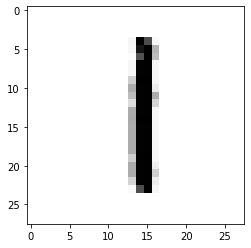

In [31]:
with torch.no_grad(): # 그래디언트 계산X
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 셋에서 무작위 추출해서 예측
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r : r+1].view(-1, 28 * 28).float()
    Y_single_data = mnist_test.test_labels[r : r+1]

    print('Label:', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r : r+1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()
